### Install Dependencies and Setup

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf

In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
alabaster                          0.7.12
altair                             5.1.2
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.5
backports.shutil-get-terminal-size 1.0.0

In [4]:
import os # To navigate the file structure

In [5]:
# List all the GPU devices on my machine
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [6]:
# List all the CPU devices on my machine
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# Limiting the memory and telling the GPUs not to use up all the memory
# The GPUs can only use what they need

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Removing Dodgy Images

In [8]:
import cv2 # allows for computer vision
import imghdr # allows to check file exension
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_10268\1631526694.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # allows to check file exension


In [9]:
data_dir = 'data'

In [10]:
os.listdir('data')

['happy', 'sad']

In [11]:
img = cv2.imread(os.path.join('data', 'happy', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'))

In [12]:
img.shape

(733, 1000, 3)

In [13]:
type(img)

numpy.ndarray

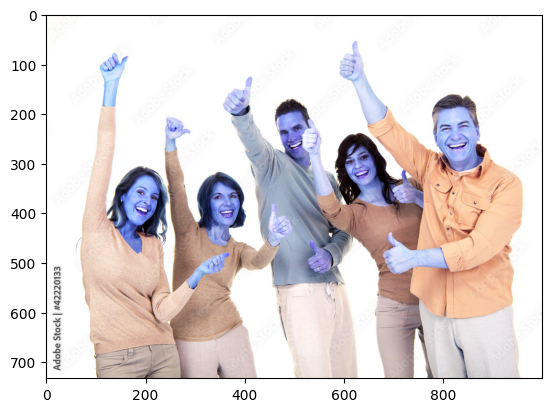

In [14]:
plt.imshow(img) #matplotlip reads RGB colors

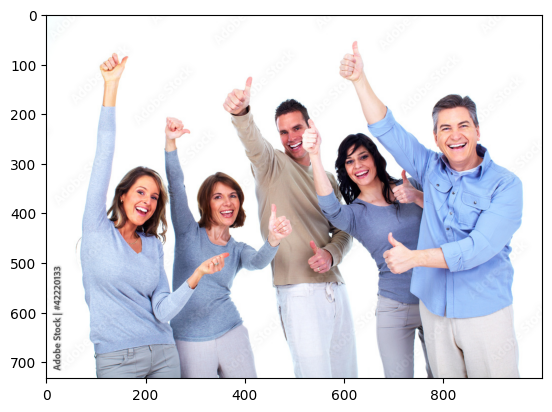

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # opencv reads in image as BGR 
#  we had to convert to RGB so matplotlib can read correctly

In [16]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir): # ['happy', 'sad'] will be iterated os.listdir(data_dir) finds all subdirectory in a directory
    for image in os.listdir(os.path.join(data_dir, image_class)): # os.path.join() joins names to form a filepath i.e data\happy\
        image_path = os.path.join(data_dir, image_class, image) # adds the image name to the file path i.e data\happy\image.jpg
        try:
            img = cv2.imread(image_path) # Reads the image of the file path as a numpy array
            tip = imghdr.what(image_path) # Checks the type of extension of the filepath
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) # Deletes a file in the filepath
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### Load dataset

In [18]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [19]:
import numpy as np

In [20]:
# Build data pipeline
data = tf.keras.utils.image_dataset_from_directory('data') # used to load image data and performs a bunch of stuff on them 

Found 280 files belonging to 2 classes.


- The **data** is a generator and not yet in memory; the images wont be gotten with data[0] and all

In [25]:
# Access data pipeline and allows us to loop through
data_iterator = data.as_numpy_iterator() # Convert to a numpy iterator to be able to access it

In [26]:
# Iterate the images and get consecutive images
# This actually gets a batch of data, or images, if its run again, the set of images will change
batch = data_iterator.next()

In [27]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [28]:
# Image Labels represented in 1 and 0 (happy or sad)
batch[1]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

- To know which class belong to sad and happy we will have to plot

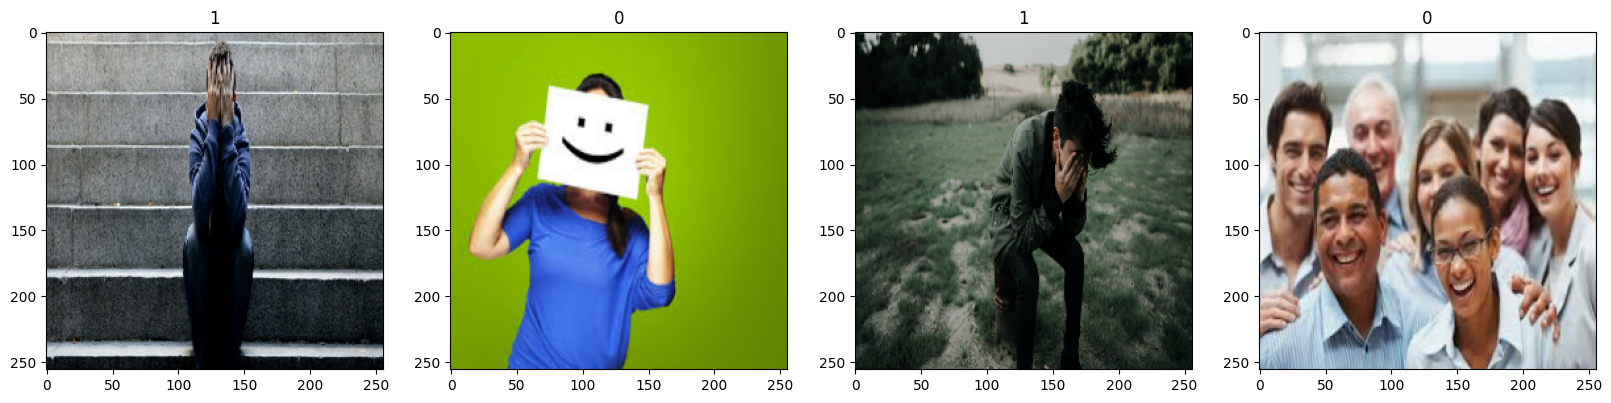

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])